# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 24.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 13.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 24.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.3 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [11]:
client = MongoClient(mongod_connect)
db = client.gp26 # use or create a database named demo
final_project = db.final_project #use or create a collection named tweet_collection
final_project.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "33.6041511,-112.6855533,150mi"  # define the location, in Phoenix, AZ
q = "Covid19"                               #define the keywords, tweets contain Covid19

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [17]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        final_project.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Dec 17 18:52:39 +0000 2020'
'Thu Dec 17 18:52:39 +0000 2020'


Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [18]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            final_project.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Dec 16 15:18:01 +0000 2020'
'Wed Dec 16 15:17:58 +0000 2020'
'Wed Dec 16 15:17:05 +0000 2020'
'Wed Dec 16 15:16:15 +0000 2020'
'Wed Dec 16 15:15:33 +0000 2020'
'Wed Dec 16 15:14:59 +0000 2020'
'Wed Dec 16 15:14:14 +0000 2020'
'Wed Dec 16 15:13:33 +0000 2020'
'Wed Dec 16 15:02:33 +0000 2020'
'Wed Dec 16 14:58:28 +0000 2020'
'Wed Dec 16 14:52:52 +0000 2020'
'Wed Dec 16 14:52:36 +0000 2020'
'Wed Dec 16 14:52:25 +0000 2020'
'Wed Dec 16 14:52:06 +0000 2020'
'Wed Dec 16 14:51:33 +0000 2020'
'Wed Dec 16 14:51:05 +0000 2020'
'Wed Dec 16 14:50:00 +0000 2020'
'Wed Dec 16 14:48:16 +0000 2020'
'Wed Dec 16 14:46:01 +0000 2020'
'Wed Dec 16 14:45:12 +0000 2020'
'Wed Dec 16 14:38:51 +0000 2020'
'Wed Dec 16 14:30:33 +0000 2020'
'Wed Dec 16 14:22:49 +0000 2020'
'Wed Dec 16 14:22:28 +0000 2020'
'Wed Dec 16 14:21:42 +0000 2020'
'Wed Dec 16 14:21:06 +0000 2020'
'Wed Dec 16 14:18:00 +0000 2020'
'Wed Dec 16 14:11:13 +0000 2020'
'Wed Dec 16 14:01:47 +0000 2020'
'Wed Dec 16 14:00:41 +0000 2020'
'Wed Dec 1

'Wed Dec 16 01:27:57 +0000 2020'
'Wed Dec 16 01:25:01 +0000 2020'
'Wed Dec 16 01:18:53 +0000 2020'
'Wed Dec 16 01:17:30 +0000 2020'
'Wed Dec 16 01:12:54 +0000 2020'
'Wed Dec 16 01:12:17 +0000 2020'
'Wed Dec 16 01:12:01 +0000 2020'
'Wed Dec 16 01:12:00 +0000 2020'
'Wed Dec 16 01:11:57 +0000 2020'
'Wed Dec 16 01:11:09 +0000 2020'
'Wed Dec 16 01:00:15 +0000 2020'
'Wed Dec 16 00:59:50 +0000 2020'
'Wed Dec 16 00:58:15 +0000 2020'
'Wed Dec 16 00:56:33 +0000 2020'
'Wed Dec 16 00:56:06 +0000 2020'
'Wed Dec 16 00:55:35 +0000 2020'
'Wed Dec 16 00:55:16 +0000 2020'
'Wed Dec 16 00:54:52 +0000 2020'
'Wed Dec 16 00:53:58 +0000 2020'
'Wed Dec 16 00:50:59 +0000 2020'
'Wed Dec 16 00:50:57 +0000 2020'
'Wed Dec 16 00:50:07 +0000 2020'
'Wed Dec 16 00:48:07 +0000 2020'
'Wed Dec 16 00:47:59 +0000 2020'
'Wed Dec 16 00:46:51 +0000 2020'
'Wed Dec 16 00:46:18 +0000 2020'
'Wed Dec 16 00:45:47 +0000 2020'
'Wed Dec 16 00:45:37 +0000 2020'
'Wed Dec 16 00:45:28 +0000 2020'
'Wed Dec 16 00:43:38 +0000 2020'
'Wed Dec 1

'Tue Dec 15 18:26:59 +0000 2020'
'Tue Dec 15 18:25:14 +0000 2020'
'Tue Dec 15 18:24:31 +0000 2020'
'Tue Dec 15 18:23:18 +0000 2020'
'Tue Dec 15 18:22:25 +0000 2020'
'Tue Dec 15 18:22:17 +0000 2020'
'Tue Dec 15 18:21:24 +0000 2020'
'Tue Dec 15 18:19:48 +0000 2020'
'Tue Dec 15 18:19:11 +0000 2020'
'Tue Dec 15 18:18:42 +0000 2020'
'Tue Dec 15 18:18:23 +0000 2020'
'Tue Dec 15 18:17:48 +0000 2020'
'Tue Dec 15 18:17:08 +0000 2020'
'Tue Dec 15 18:15:43 +0000 2020'
'Tue Dec 15 18:14:37 +0000 2020'
'Tue Dec 15 18:14:33 +0000 2020'
'Tue Dec 15 18:14:24 +0000 2020'
'Tue Dec 15 18:14:16 +0000 2020'
'Tue Dec 15 18:13:12 +0000 2020'
'Tue Dec 15 18:07:43 +0000 2020'
'Tue Dec 15 18:07:31 +0000 2020'
'Tue Dec 15 18:04:56 +0000 2020'
'Tue Dec 15 18:04:07 +0000 2020'
'Tue Dec 15 18:02:37 +0000 2020'
'Tue Dec 15 18:02:30 +0000 2020'
'Tue Dec 15 18:01:52 +0000 2020'
'Tue Dec 15 18:01:48 +0000 2020'
'Tue Dec 15 18:00:55 +0000 2020'
'Tue Dec 15 18:00:33 +0000 2020'
'Tue Dec 15 18:00:24 +0000 2020'
'Tue Dec 1

'Tue Dec 15 10:21:38 +0000 2020'
'Tue Dec 15 10:21:11 +0000 2020'
'Tue Dec 15 10:20:29 +0000 2020'
'Tue Dec 15 10:19:59 +0000 2020'
'Tue Dec 15 10:19:44 +0000 2020'
'Tue Dec 15 10:19:29 +0000 2020'
'Tue Dec 15 10:19:17 +0000 2020'
'Tue Dec 15 10:19:13 +0000 2020'
'Tue Dec 15 10:19:04 +0000 2020'
'Tue Dec 15 10:18:55 +0000 2020'
'Tue Dec 15 10:18:51 +0000 2020'
'Tue Dec 15 10:18:45 +0000 2020'
'Tue Dec 15 10:18:37 +0000 2020'
'Tue Dec 15 10:18:31 +0000 2020'
'Tue Dec 15 10:18:15 +0000 2020'
'Tue Dec 15 10:18:06 +0000 2020'
'Tue Dec 15 10:18:00 +0000 2020'
'Tue Dec 15 10:17:54 +0000 2020'
'Tue Dec 15 10:17:48 +0000 2020'
'Tue Dec 15 10:17:41 +0000 2020'
'Tue Dec 15 10:17:32 +0000 2020'
'Tue Dec 15 10:17:27 +0000 2020'
'Tue Dec 15 10:17:23 +0000 2020'
'Tue Dec 15 10:17:13 +0000 2020'
'Tue Dec 15 10:17:01 +0000 2020'
'Tue Dec 15 10:16:39 +0000 2020'
'Tue Dec 15 10:03:13 +0000 2020'
'Tue Dec 15 10:01:26 +0000 2020'
'Tue Dec 15 09:57:54 +0000 2020'
'Tue Dec 15 09:45:42 +0000 2020'
'Tue Dec 1

'Tue Dec 15 00:57:06 +0000 2020'
'Tue Dec 15 00:55:40 +0000 2020'
'Tue Dec 15 00:50:47 +0000 2020'
'Tue Dec 15 00:49:53 +0000 2020'
'Tue Dec 15 00:44:51 +0000 2020'
'Tue Dec 15 00:42:43 +0000 2020'
'Tue Dec 15 00:39:39 +0000 2020'
'Tue Dec 15 00:39:22 +0000 2020'
'Tue Dec 15 00:38:50 +0000 2020'
'Tue Dec 15 00:38:25 +0000 2020'
'Tue Dec 15 00:35:05 +0000 2020'
'Tue Dec 15 00:34:43 +0000 2020'
'Tue Dec 15 00:34:42 +0000 2020'
'Tue Dec 15 00:34:07 +0000 2020'
'Tue Dec 15 00:31:48 +0000 2020'
'Tue Dec 15 00:30:26 +0000 2020'
'Tue Dec 15 00:30:25 +0000 2020'
'Tue Dec 15 00:26:59 +0000 2020'
'Tue Dec 15 00:25:55 +0000 2020'
'Tue Dec 15 00:24:28 +0000 2020'
'Tue Dec 15 00:23:33 +0000 2020'
'Tue Dec 15 00:22:29 +0000 2020'
'Tue Dec 15 00:22:06 +0000 2020'
'Tue Dec 15 00:18:48 +0000 2020'
'Tue Dec 15 00:18:23 +0000 2020'
'Tue Dec 15 00:17:35 +0000 2020'
'Tue Dec 15 00:17:26 +0000 2020'
'Tue Dec 15 00:16:24 +0000 2020'
'Tue Dec 15 00:14:32 +0000 2020'
'Tue Dec 15 00:14:04 +0000 2020'
'Tue Dec 1

'Mon Dec 14 18:04:02 +0000 2020'
'Mon Dec 14 18:03:38 +0000 2020'
'Mon Dec 14 18:02:01 +0000 2020'
'Mon Dec 14 18:00:55 +0000 2020'
'Mon Dec 14 17:58:35 +0000 2020'
'Mon Dec 14 17:58:25 +0000 2020'
'Mon Dec 14 17:58:13 +0000 2020'
'Mon Dec 14 17:56:25 +0000 2020'
'Mon Dec 14 17:56:03 +0000 2020'
'Mon Dec 14 17:54:58 +0000 2020'
'Mon Dec 14 17:54:39 +0000 2020'
'Mon Dec 14 17:53:37 +0000 2020'
'Mon Dec 14 17:52:39 +0000 2020'
'Mon Dec 14 17:52:25 +0000 2020'
'Mon Dec 14 17:50:05 +0000 2020'
'Mon Dec 14 17:49:50 +0000 2020'
'Mon Dec 14 17:49:32 +0000 2020'
'Mon Dec 14 17:45:26 +0000 2020'
'Mon Dec 14 17:43:53 +0000 2020'
'Mon Dec 14 17:43:25 +0000 2020'
'Mon Dec 14 17:42:46 +0000 2020'
'Mon Dec 14 17:41:23 +0000 2020'
'Mon Dec 14 17:40:29 +0000 2020'
'Mon Dec 14 17:38:53 +0000 2020'
'Mon Dec 14 17:38:14 +0000 2020'
'Mon Dec 14 17:37:32 +0000 2020'
'Mon Dec 14 17:37:30 +0000 2020'
'Mon Dec 14 17:37:23 +0000 2020'
'Mon Dec 14 17:36:07 +0000 2020'
'Mon Dec 14 17:36:02 +0000 2020'
'Mon Dec 1

'Mon Dec 14 14:44:34 +0000 2020'
'Mon Dec 14 14:43:37 +0000 2020'
'Mon Dec 14 14:40:36 +0000 2020'
'Mon Dec 14 14:40:15 +0000 2020'
'Mon Dec 14 14:37:22 +0000 2020'
'Mon Dec 14 14:36:13 +0000 2020'
'Mon Dec 14 14:35:58 +0000 2020'
'Mon Dec 14 14:35:27 +0000 2020'
'Mon Dec 14 14:32:38 +0000 2020'
'Mon Dec 14 14:27:57 +0000 2020'
'Mon Dec 14 14:26:52 +0000 2020'
'Mon Dec 14 14:26:49 +0000 2020'
'Mon Dec 14 14:26:04 +0000 2020'
'Mon Dec 14 14:24:48 +0000 2020'
'Mon Dec 14 14:24:14 +0000 2020'
'Mon Dec 14 14:23:21 +0000 2020'
'Mon Dec 14 14:23:21 +0000 2020'
'Mon Dec 14 14:23:07 +0000 2020'
'Mon Dec 14 14:22:50 +0000 2020'
'Mon Dec 14 14:22:47 +0000 2020'
'Mon Dec 14 14:22:23 +0000 2020'
'Mon Dec 14 14:21:35 +0000 2020'
'Mon Dec 14 14:21:31 +0000 2020'
'Mon Dec 14 14:17:48 +0000 2020'
'Mon Dec 14 14:13:53 +0000 2020'
'Mon Dec 14 14:12:57 +0000 2020'
'Mon Dec 14 14:12:55 +0000 2020'
'Mon Dec 14 14:12:35 +0000 2020'
'Mon Dec 14 14:09:54 +0000 2020'
'Mon Dec 14 14:09:37 +0000 2020'
'Mon Dec 1

'Mon Dec 14 03:03:34 +0000 2020'
'Mon Dec 14 03:03:14 +0000 2020'
'Mon Dec 14 03:02:49 +0000 2020'
'Mon Dec 14 03:02:44 +0000 2020'
'Mon Dec 14 03:02:29 +0000 2020'
'Mon Dec 14 03:01:36 +0000 2020'
'Mon Dec 14 03:01:27 +0000 2020'
'Mon Dec 14 03:01:22 +0000 2020'
'Mon Dec 14 02:59:43 +0000 2020'
'Mon Dec 14 02:58:42 +0000 2020'
'Mon Dec 14 02:55:09 +0000 2020'
'Mon Dec 14 02:54:04 +0000 2020'
'Mon Dec 14 02:51:07 +0000 2020'
'Mon Dec 14 02:49:18 +0000 2020'
'Mon Dec 14 02:48:24 +0000 2020'
'Mon Dec 14 02:48:02 +0000 2020'
'Mon Dec 14 02:47:50 +0000 2020'
'Mon Dec 14 02:46:38 +0000 2020'
'Mon Dec 14 02:41:32 +0000 2020'
'Mon Dec 14 02:40:28 +0000 2020'
'Mon Dec 14 02:40:23 +0000 2020'
'Mon Dec 14 02:37:06 +0000 2020'
'Mon Dec 14 02:33:33 +0000 2020'
'Mon Dec 14 02:32:27 +0000 2020'
'Mon Dec 14 02:31:52 +0000 2020'
'Mon Dec 14 02:31:44 +0000 2020'
'Mon Dec 14 02:31:34 +0000 2020'
'Mon Dec 14 02:31:24 +0000 2020'
'Mon Dec 14 02:30:30 +0000 2020'
'Mon Dec 14 02:26:46 +0000 2020'
'Mon Dec 1

'Sun Dec 13 17:26:27 +0000 2020'
'Sun Dec 13 17:25:09 +0000 2020'
'Sun Dec 13 17:21:53 +0000 2020'
'Sun Dec 13 17:21:19 +0000 2020'
'Sun Dec 13 17:20:49 +0000 2020'
'Sun Dec 13 17:20:40 +0000 2020'
'Sun Dec 13 17:16:11 +0000 2020'
'Sun Dec 13 17:13:20 +0000 2020'
'Sun Dec 13 17:10:05 +0000 2020'
'Sun Dec 13 17:06:25 +0000 2020'
'Sun Dec 13 17:04:47 +0000 2020'
'Sun Dec 13 17:03:14 +0000 2020'
'Sun Dec 13 17:01:40 +0000 2020'
'Sun Dec 13 16:56:33 +0000 2020'
'Sun Dec 13 16:45:16 +0000 2020'
'Sun Dec 13 16:45:04 +0000 2020'
'Sun Dec 13 16:45:00 +0000 2020'
'Sun Dec 13 16:43:36 +0000 2020'
'Sun Dec 13 16:43:23 +0000 2020'
'Sun Dec 13 16:42:38 +0000 2020'
'Sun Dec 13 16:42:21 +0000 2020'
'Sun Dec 13 16:42:10 +0000 2020'
'Sun Dec 13 16:38:57 +0000 2020'
'Sun Dec 13 16:38:39 +0000 2020'
'Sun Dec 13 16:29:45 +0000 2020'
'Sun Dec 13 16:29:34 +0000 2020'
'Sun Dec 13 16:28:56 +0000 2020'
'Sun Dec 13 16:27:58 +0000 2020'
'Sun Dec 13 16:27:47 +0000 2020'
'Sun Dec 13 16:27:36 +0000 2020'
'Sun Dec 1

'Sun Dec 13 02:40:04 +0000 2020'
'Sun Dec 13 02:34:15 +0000 2020'
'Sun Dec 13 02:27:26 +0000 2020'
'Sun Dec 13 02:27:25 +0000 2020'
'Sun Dec 13 02:22:55 +0000 2020'
'Sun Dec 13 02:21:22 +0000 2020'
'Sun Dec 13 02:17:59 +0000 2020'
'Sun Dec 13 02:17:39 +0000 2020'
'Sun Dec 13 02:16:04 +0000 2020'
'Sun Dec 13 02:14:13 +0000 2020'
'Sun Dec 13 02:13:15 +0000 2020'
'Sun Dec 13 02:11:09 +0000 2020'
'Sun Dec 13 02:05:39 +0000 2020'
'Sun Dec 13 02:02:00 +0000 2020'
'Sun Dec 13 02:01:38 +0000 2020'
'Sun Dec 13 02:00:25 +0000 2020'
'Sun Dec 13 01:59:06 +0000 2020'
'Sun Dec 13 01:58:04 +0000 2020'
'Sun Dec 13 01:53:55 +0000 2020'
'Sun Dec 13 01:50:59 +0000 2020'
'Sun Dec 13 01:47:27 +0000 2020'
'Sun Dec 13 01:47:26 +0000 2020'
'Sun Dec 13 01:45:54 +0000 2020'
'Sun Dec 13 01:45:22 +0000 2020'
'Sun Dec 13 01:45:01 +0000 2020'
'Sun Dec 13 01:44:29 +0000 2020'
'Sun Dec 13 01:36:37 +0000 2020'
'Sun Dec 13 01:36:20 +0000 2020'
'Sun Dec 13 01:35:39 +0000 2020'
'Sun Dec 13 01:27:42 +0000 2020'
'Sun Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [19]:
print(final_project.estimated_document_count())# number of tweets collected

user_cursor = final_project.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4280
2459


Create a text index and print the Tweets containing specific keywords. 

In [20]:
final_project.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [23]:
tweet_cursor = final_project.find({"$text": {"$search": "Covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [24]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: First White Female VP Elect Stacey
text: @FOX10Phoenix Are these deaths really “from Covid19” or deaths “with Covid19”?
There’s a difference.
The article me… https://t.co/0RQZtHimh9
----
name: I.Yesy
text: RT @chadbensonshow: Enough is enough now they're telling us your home is the most dangerous place when it comes to Covid19.
#COVID19 #COVID…
----
name: #StayHome
text: RT @chadbensonshow: Enough is enough now they're telling us your home is the most dangerous place when it comes to Covid19.
#COVID19 #COVID…
----
name: Today
text: You know the CDC has been counting Puemonia and Influenza death as #Covid19. Why? Political Only. Assures #COVID19… https://t.co/jMaxZPhZVG
----
name: CHAD BENSON
text: Enough is enough now they're telling us your home is the most dangerous place when it comes to Covid19.
#COVID19… https://t.co/7jKYYX1WtT
----
name: 🇺🇸 CesarCota 4 Education Policy 🇲🇽
text: RT @TucsonRomero: Free #COVID19 saliva testing today at Sentinel Building. Look for the @Res

In [25]:
tweet_cursor = final_project.find({"$text": {"$search": "Covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [26]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities
0,5fdba935516f787b56db64e4,Tue Dec 15 15:26:21 +0000 2020,1338868001517363200,1338868001517363200,@FOX10Phoenix Are these deaths really “from Co...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.338736e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fdba932516f787b56db63d0,Tue Dec 15 20:35:32 +0000 2020,1338945812223627265,1338945812223627265,RT @chadbensonshow: Enough is enough now they'...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Tue Dec 15 20:16:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN
2,5fdba932516f787b56db63cf,Tue Dec 15 20:35:33 +0000 2020,1338945816908730368,1338945816908730368,RT @chadbensonshow: Enough is enough now they'...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,0,False,False,en,{'created_at': 'Tue Dec 15 20:16:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN
3,5fdba8e3516f787b56db56f4,Thu Dec 17 06:54:47 +0000 2020,1339464036753178626,1339464036753178626,You know the CDC has been counting Puemonia an...,True,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,1.339460e+18,1339460397745651712,{'created_at': 'Thu Dec 17 06:40:19 +0000 2020...,False,NaN
4,5fdba932516f787b56db63dd,Tue Dec 15 20:16:00 +0000 2020,1338940895152857089,1338940895152857089,Enough is enough now they're telling us your h...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,15,False,False,en,NaN,NaN,NaN,NaN,False,NaN
5,5fdba944516f787b56db6ac6,Sun Dec 13 15:01:45 +0000 2020,1338137035312230401,1338137035312230401,RT @TucsonRomero: Free #COVID19 saliva testing...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,es,{'created_at': 'Sun Dec 13 15:01:35 +0000 2020...,NaN,NaN,NaN,NaN,NaN
6,5fdba944516f787b56db6ac5,Sun Dec 13 15:02:11 +0000 2020,1338137146092228610,1338137146092228610,RT @TucsonRomero: Free #COVID19 saliva testing...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,es,{'created_at': 'Sun Dec 13 15:01:35 +0000 2020...,NaN,NaN,NaN,NaN,NaN
7,5fdba944516f787b56db6ac4,Sun Dec 13 15:02:18 +0000 2020,1338137174378565632,1338137174378565632,RT @TucsonRomero: Free #COVID19 saliva testing...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0,False,False,es,{'created_at': 'Sun Dec 13 15:01:35 +0000 2020...,NaN,NaN,NaN,NaN,NaN
8,5fdba944516f787b56db6ac3,Sun Dec 13 15:02:22 +0000 2020,1338137190396674049,1338137190396674049,RT @TucsonRomero: Free #COVID19 saliva testing...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,es,{'created_at': 'Sun Dec 13 15:01:35 +0000 2020...,NaN,NaN,NaN,NaN,NaN
9,5fdba944516f787b56db6ac2,Sun Dec 13 15:03:19 +0000 2020,1338137430667317250,1338137430667317250,RT @TucsonRomero: Free #COVID19 saliva testing...,False,

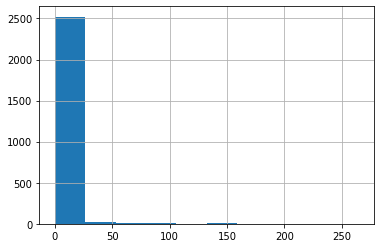

In [27]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count